# Entrainement DQN pour Space Invaders IA

In [1]:
import dqn
from game_environnement.space_invaders_game.Code.Main import Game
from game_environnement.space_invaders_env import SpaceInvadersEnv
from dqn.dqn_agent import train_dqn
from dqn.dqn_agent import DQNAgent

import pygame
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import os
import torch


/Users/Florian/Documents/Ecole/UQAC/Cours-Obsidian/Cours/Cours - UQAC/Fondamentaux de l apprentissage automatique/projets/Space Invaders/venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.12.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
pygame.init()

pygame.display.set_mode((100, 100))  

game = Game(600, 600, screen=None)
env = SpaceInvadersEnv(game)

print("=== DÉBUT DE L'ENTRAINEMENT DQN ===")
rewards = train_dqn(env, episodes=100)
print("=== FIN DE L'ENTRAINEMENT DQN ===")

=== DÉBUT DE L'ENTRAINEMENT DQN ===
Episode 1/100 - Reward: -40.88 - Epsilon: 0.995
Episode 2/100 - Reward: -133.13 - Epsilon: 0.990
Episode 3/100 - Reward: -143.78 - Epsilon: 0.985
Episode 4/100 - Reward: -32.45 - Epsilon: 0.980
Episode 5/100 - Reward: -18.25 - Epsilon: 0.975
Episode 6/100 - Reward: -17.77 - Epsilon: 0.970
Episode 7/100 - Reward: -134.33 - Epsilon: 0.966
Episode 8/100 - Reward: -19.89 - Epsilon: 0.961
Episode 9/100 - Reward: -41.52 - Epsilon: 0.956
Episode 10/100 - Reward: -148.27 - Epsilon: 0.951
Episode 11/100 - Reward: -38.11 - Epsilon: 0.946
Episode 12/100 - Reward: -20.18 - Epsilon: 0.942
Episode 13/100 - Reward: -34.10 - Epsilon: 0.937
Episode 14/100 - Reward: -144.81 - Epsilon: 0.932
Episode 15/100 - Reward: -21.14 - Epsilon: 0.928
Episode 16/100 - Reward: -138.05 - Epsilon: 0.923
Episode 17/100 - Reward: -135.03 - Epsilon: 0.918
Episode 18/100 - Reward: -47.11 - Epsilon: 0.914
Episode 19/100 - Reward: -18.68 - Epsilon: 0.909
Episode 20/100 - Reward: -138.11 - 

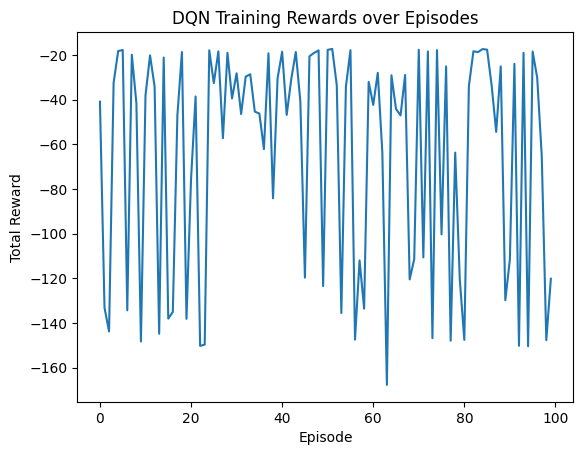

In [3]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('DQN Training Rewards over Episodes')
plt.show()

## Épisodes de test

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -- DÉTECTION TAILLE & AGENT ---
initial_state = env.reset()
#real_state_size = initial_state.shape[0]
real_state_size = 6
action_size = 4
agent = DQNAgent(real_state_size, action_size)

# --- CHARGEMENT MODÈLE ---
model_path = "models/dqn_space_invaders.pth"
device = torch.device("cpu") # CPU obligatoire pour éviter les conflits
agent.device = device
agent.q_network.to(device)

try:
    print("Dossier courant :", os.getcwd())
    checkpoint = torch.load(model_path, map_location=device)
    if isinstance(checkpoint, dict) and 'state_size' not in checkpoint:
        agent.q_network.load_state_dict(checkpoint)
    else:
        agent.q_network.load_state_dict(checkpoint)
    agent.q_network.eval()
    print("Cerveau de l'IA chargé !")
except FileNotFoundError:
    print(f"Fichier '{model_path}' introuvable.")
    pygame.quit()
    raise SystemExit

Dossier courant : /Users/Florian/Documents/Ecole/UQAC/Cours-Obsidian/Cours/Cours - UQAC/Fondamentaux de l apprentissage automatique/projets/Space Invaders/game_environnement/space_invaders_game/Code
Cerveau de l'IA chargé !


In [5]:
def evaluate_agent(env, agent, n_episodes=50):
    """
    Évalue les performances de l'agent sur n_episodes sans exploration.
    """
    print(f"--- Démarrage de l'évaluation sur {n_episodes} épisodes ---")
    
    # 1. Sauvegarder l'epsilon actuel et le mettre à 0 pour le test (Exploitation pure)
    original_epsilon = agent.epsilon
    agent.epsilon = 0.0
    
    # Mettre le réseau en mode évaluation (pas de calcul de gradients inutile)
    agent.q_network.eval()
    
    game_scores = []      # Vrais scores du jeu (points affichés à l'écran)
    total_rewards = []    # Rewards cumulées (ce que l'IA optimise)
    steps_survived = []   # Durée de survie

    for i in range(n_episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        episode_steps = 0
        
        while not done:
            # L'agent choisit l'action (sans aléatoire car epsilon=0)
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            
            state = next_state
            episode_reward += reward
            episode_steps += 1
            
        # Fin de l'épisode
        game_scores.append(env.game.score) # On récupère le score interne du jeu
        total_rewards.append(episode_reward)
        steps_survived.append(episode_steps)
        
        # if (i+1) % 10 == 0:
        print(f"Episode {i+1}/{n_episodes} - Score Jeu: {env.game.score} - Reward: {episode_reward:.2f}")

    # 2. Restaurer la configuration de l'agent
    agent.epsilon = original_epsilon
    agent.q_network.train() # Remettre en mode train si besoin
    
    # 3. Calcul des statistiques
    avg_score = np.mean(game_scores)
    std_score = np.std(game_scores)
    max_score = np.max(game_scores)
    
    avg_reward = np.mean(total_rewards)
    avg_steps = np.mean(steps_survived)
    
    print("\n=== RÉSULTATS DE L'ÉVALUATION ===")
    print(f"Score Moyen (Jeu)   : {avg_score:.2f} ± {std_score:.2f}")
    print(f"Score Max (Jeu)     : {max_score}")
    print(f"Reward Moyenne (RL) : {avg_reward:.2f}")
    print(f"Survie Moyenne      : {avg_steps:.1f} steps")
    
    return game_scores, total_rewards

--- Démarrage de l'évaluation sur 50 épisodes ---
Episode 1/50 - Score Jeu: 100 - Reward: -68.34
Episode 2/50 - Score Jeu: 100 - Reward: -140.59
Episode 3/50 - Score Jeu: 100 - Reward: -40.41
Episode 4/50 - Score Jeu: 100 - Reward: -127.55
Episode 5/50 - Score Jeu: 100 - Reward: -161.04
Episode 6/50 - Score Jeu: 100 - Reward: -28.31
Episode 7/50 - Score Jeu: 100 - Reward: -21.35
Episode 8/50 - Score Jeu: 100 - Reward: -35.90
Episode 9/50 - Score Jeu: 100 - Reward: -58.48
Episode 10/50 - Score Jeu: 100 - Reward: -23.00
Episode 11/50 - Score Jeu: 100 - Reward: -21.41
Episode 12/50 - Score Jeu: 100 - Reward: -16.87
Episode 13/50 - Score Jeu: 100 - Reward: -18.08
Episode 14/50 - Score Jeu: 100 - Reward: -27.57
Episode 15/50 - Score Jeu: 100 - Reward: -17.61
Episode 16/50 - Score Jeu: 100 - Reward: -22.06
Episode 17/50 - Score Jeu: 100 - Reward: -92.19
Episode 18/50 - Score Jeu: 100 - Reward: -150.59
Episode 19/50 - Score Jeu: 100 - Reward: -20.25
Episode 20/50 - Score Jeu: 100 - Reward: -6

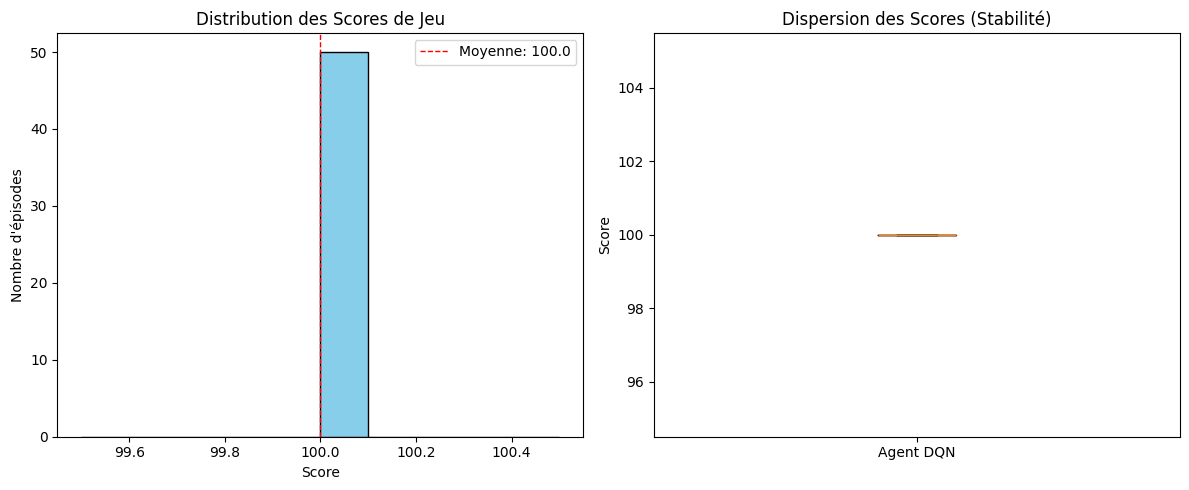

In [7]:
# --- Exécution de l'évaluation ---
# Assurez-vous que 'env' et 'agent' sont bien instanciés (ceux de votre fin d'entraînement)
test_scores, test_rewards = evaluate_agent(env, agent, n_episodes=50)

# --- Visualisation Graphique ---
plt.figure(figsize=(12, 5))

# 1. Histogramme des scores
plt.subplot(1, 2, 1)
plt.hist(test_scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des Scores de Jeu')
plt.xlabel('Score')
plt.ylabel('Nombre d\'épisodes')
plt.axvline(np.mean(test_scores), color='red', linestyle='dashed', linewidth=1, label=f'Moyenne: {np.mean(test_scores):.1f}')
plt.legend()

# 2. Boxplot (pour voir la stabilité)
plt.subplot(1, 2, 2)
plt.boxplot(test_scores)
plt.title('Dispersion des Scores (Stabilité)')
plt.ylabel('Score')
plt.xticks([1], ['Agent DQN'])

plt.tight_layout()
plt.show()